<a href="https://colab.research.google.com/github/TsabitaNurul/Temu_Kembali_Citra/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2
import numpy as np

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:28<00:00, 42.7MB/s]
100% 2.29G/2.29G [00:28<00:00, 87.2MB/s]


In [ ]:
api_token = {"username":"ccaliza","key":"05b74c0d0ee9d6eb049096e84efca7bf"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/content/chest-xray-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

RESIZE

In [ ]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
args = {
	"image": "/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
}

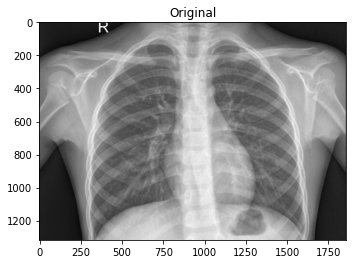

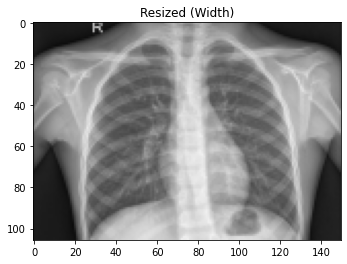

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

SPLIT IMAGE

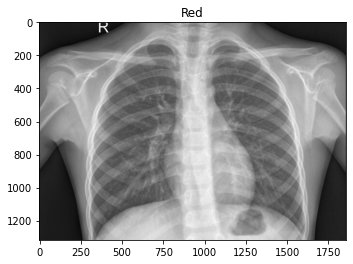

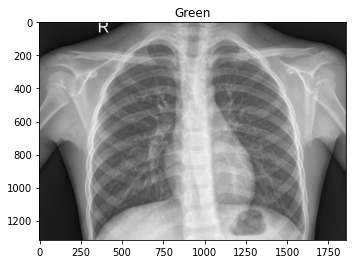

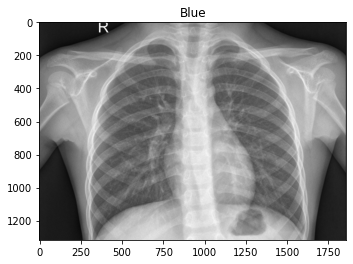

In [ ]:
# represents images as NumPy arrays with channels in Blue, Green,
# Red ordering rather than Red, Green Blue
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

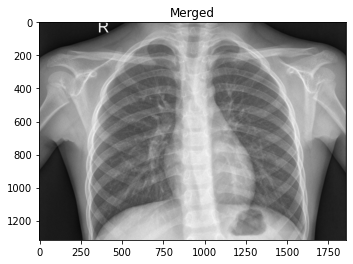

In [ ]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

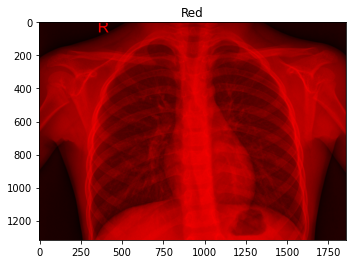

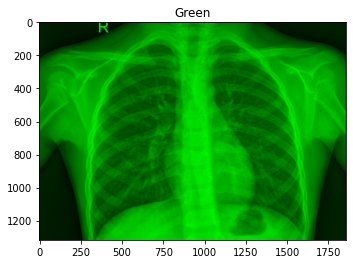

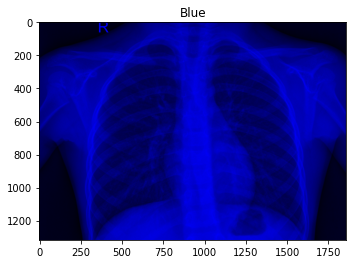

In [ ]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

PIXEL

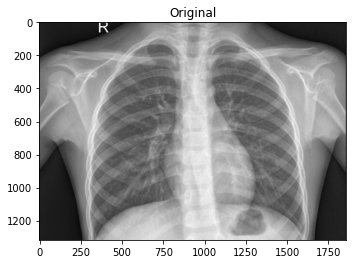

In [ ]:
# load the image, grab its spatial dimensions (width and height),
# and then display the original image to our screen
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [ ]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 0, Green: 0, Blue: 0
Pixel at (50, 20) - Red: 30, Green: 30, Blue: 30
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


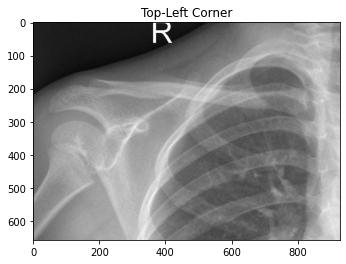

In [ ]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

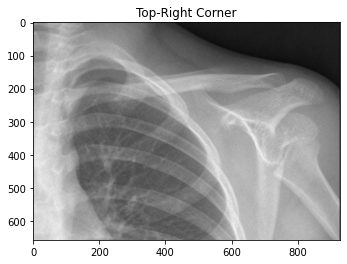

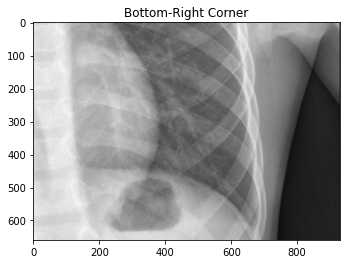

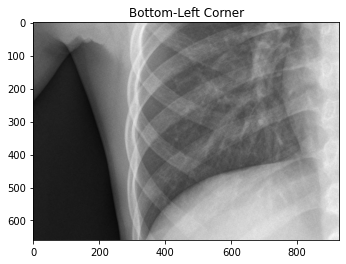

In [ ]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

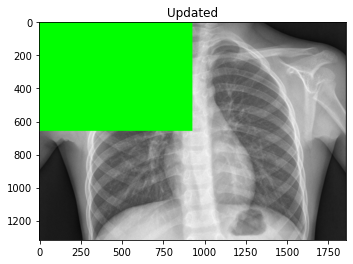

In [ ]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

READ WHITE IMAGE

In [ ]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 1857 pixels
height: 1317  pixels
channels: 3


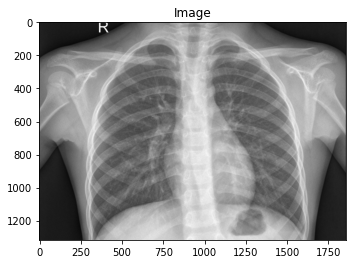

True

In [ ]:
# show the image and wait for a keypress
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("pneumonia_new.jpg", image)

MASKING

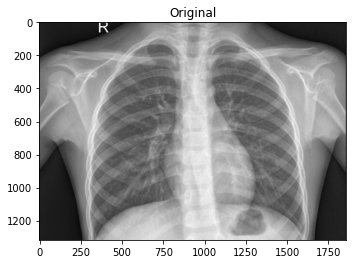

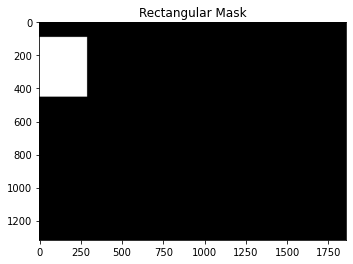

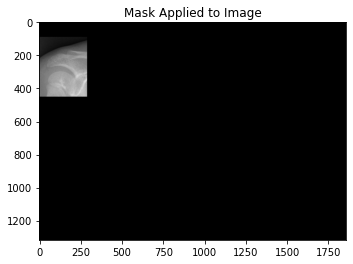

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

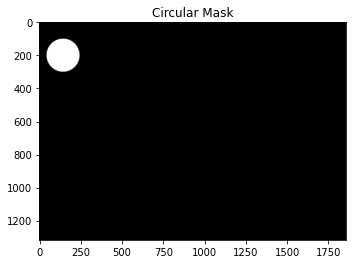

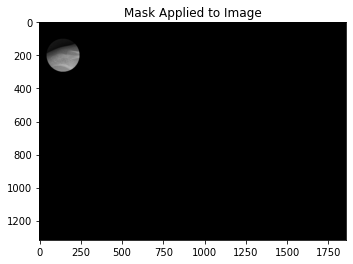

In [ ]:
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

DRAWING

In [ ]:
# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

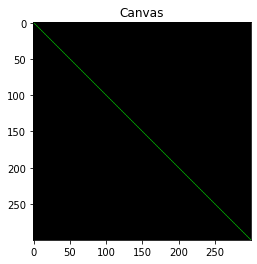

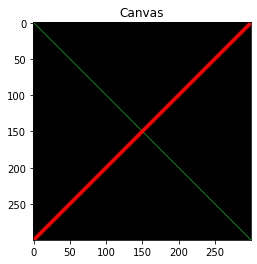

In [ ]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

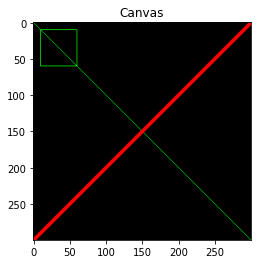

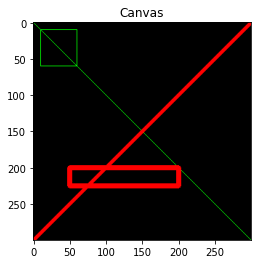

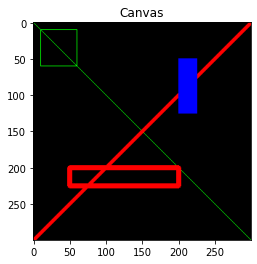

In [ ]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

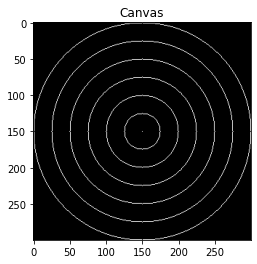

In [ ]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
	# draw a white circle with the current radius size
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

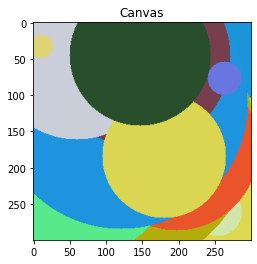

In [ ]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our screen
plt_imshow("Canvas", canvas)

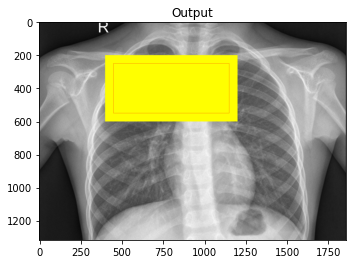

In [ ]:
# load the input image from disk
image = cv2.imread(args["image"])

cv2.rectangle(image, (400, 200), (1200, 600), (0, 255, 255), -1)
cv2.rectangle(image, (450, 250), (1150, 550), (0, 0, 255), 1)

# show the output image
plt_imshow("Output", image)

CROPPING IMAGE

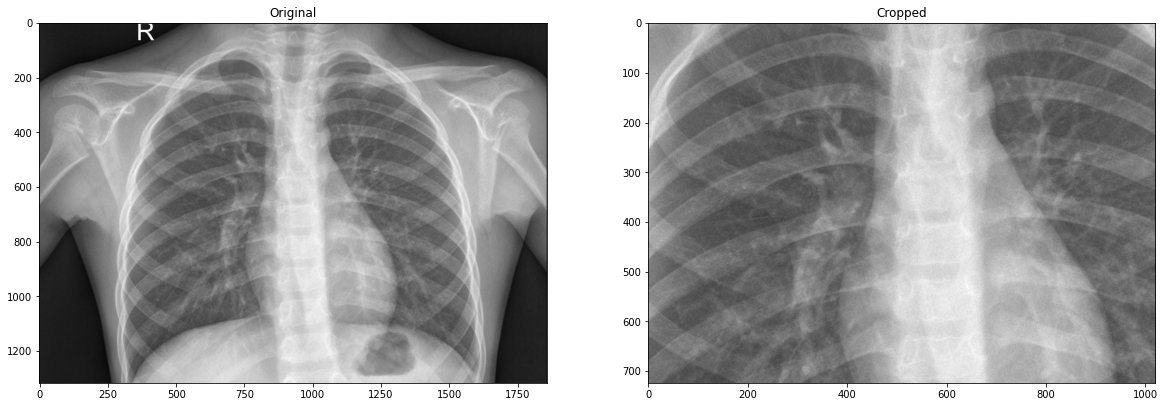

In [ ]:
image = cv2.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
Image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(Image)

height, width = image.shape[:2]
# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .20), int(width * .20)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]


plt.subplot(2, 2, 2)
plt.title("Cropped")
plt.imshow(cropped)

FLIPPING IMAGE

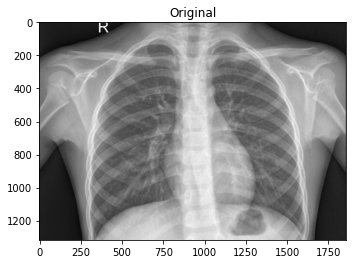

[INFO] flipping image horizontally...


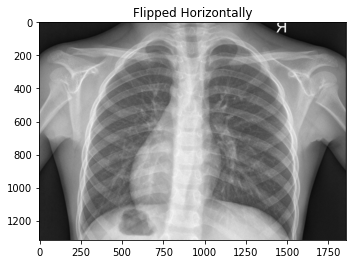

[INFO] flipping image vertically...


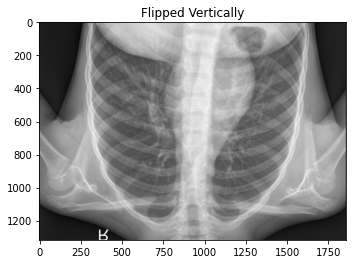

[INFO] flipping image horizontally and vertically...


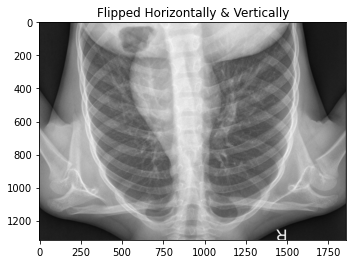

In [ ]:
Image = cv2.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

flipped = cv2.flip(Image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

ROTATE IMAGE

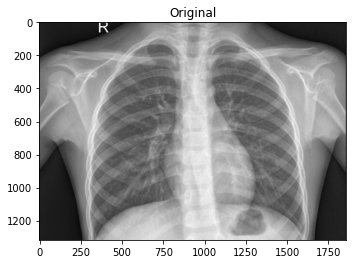

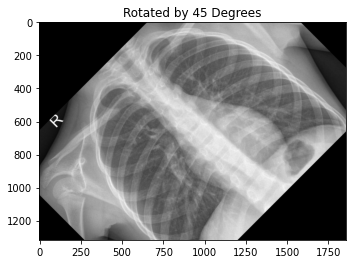

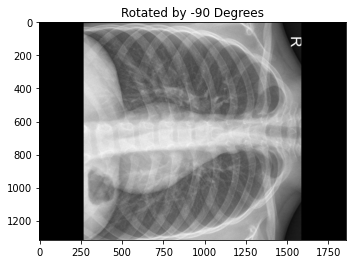

In [32]:
# load the image and show it
image = cv2.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = Image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(Image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)